# New Notebook

Whats this notebook about?

env: KERAS_BACKEND=tensorflow


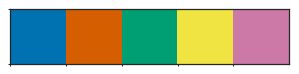

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [21]:
from collections import Counter
import regex
import gc as garbage_collection
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from seaborn.utils import ci as conf_invs
from joblib import Parallel, delayed

from Bio.SeqIO import parse
from Bio.SeqUtils import seq1 as seq_edit
from Bio.SeqUtils.CodonUsage import SynonymousCodons as SYN_CODON

%env KERAS_BACKEND tensorflow
from g4seeqer.g4hunter import reverse_complement, g4hunter
from g4seeqer.neuralnet import load_model, one_hot_sequence, decode_ohe
from g4seeqer import mutmap as mm
import h5py as h5

from ipywidgets import FloatProgress
from IPython.display import display, clear_output

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=2, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7'])
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

%load_ext cython

TRANSLATION_TABLE = {cdn: seq_edit(aa)
                     for aa, codons in SYN_CODON.items()
                     for cdn in codons}

In [22]:
seqs = []
seq_ids = []
with open('/home/matthew/Documents/genomes/tair10/fasta/tair10_cds.fa') as cds:
    for record in parse(cds, 'fasta'):
        if len(str(record.seq)) % 3:
            continue
        #seqs.append(str(record.seq))
        seq_ids.append(record.id)

In [61]:
summarised = {}
with h5.File('./data/tair10_cds_rev_trans.h5', 'r') as f:
    print(f['real/g4s/fwd'].shape)
    summarised['real'] = {}
    summarised['sim'] = {}
    summarised['real']['g'] = {}
    summarised['real']['g']['fwd'] = np.mean(f['real/g/fwd'], axis=0)
    summarised['real']['g']['rev'] = np.mean(f['real/g/rev'], axis=0)
    summarised['sim']['g'] = {}
    summarised['sim']['g']['fwd'] = np.mean(f['sim/g/fwd'], axis=(0, 1))
    summarised['sim']['g']['rev'] = np.mean(f['sim/g/rev'], axis=(0, 1))
    summarised['real']['qp'] = {}
    summarised['sim']['qp'] = {}
    summarised['real']['qp']['fwd'] = np.mean(f['real/qp/fwd'][:] > 0, axis=0)
    summarised['sim']['qp']['fwd'] = np.mean(f['sim/qp/fwd'][:] > 0, axis=(0, 1))
    summarised['real']['qp']['rev'] = np.mean(f['real/qp/rev'][:] > 0, axis=0)
    summarised['sim']['qp']['rev'] = np.mean(f['sim/qp/rev'][:] > 0, axis=(0, 1))
    summarised['real']['g4s'] = {}
    summarised['sim']['g4s'] = {}
    summarised['real']['g4s']['fwd'] = np.mean(f['real/g4s/fwd'][:] > 0, axis=0)
    summarised['sim']['g4s']['fwd'] = np.mean(f['sim/g4s/fwd'][:] > 0, axis=(0, 1))
    summarised['real']['g4s']['rev'] = np.mean(f['real/g4s/rev'][:] > 0, axis=0)
    summarised['sim']['g4s']['rev'] = np.mean(f['sim/g4s/rev'][:] > 0, axis=(0, 1))
    summarised['real']['g4h'] = {}
    summarised['sim']['g4h'] = {}
    summarised['real']['g4h']['fwd'] = np.mean(f['real/g4h/fwd'], axis=0)
    summarised['sim']['g4h']['fwd'] = np.mean(f['sim/g4h/fwd'], axis=(0, 1))
    summarised['real']['g4h']['rev'] = np.mean(f['real/g4h/rev'], axis=0)
    summarised['sim']['g4h']['rev'] = np.mean(f['sim/g4h/rev'], axis=(0, 1))
#    summarised['enrichment'] = {}
#    summarised['enrichment']['qp'] = {}
#    summarised['enrichment']['g4s'] = {}
#    summarised['enrichment']['fwd'] = pd.DataFrame(np.log2(f['real/g4s/fwd'] / np.mean(f['sim/g4s/fwd'], axis=1)), index=seq_ids)
#    summarised['enrichment']['rev'] = pd.DataFrame(np.log2(f['real/g4s/rev'] / np.mean(f['sim/g4s/rev'], axis=1)), index=seq_ids)
#    summarised['p_val'] = {}
#    summarised['p_val']['qp'] = {}
#    summarised['p_val']['g4s'] = {}
#    summarised['p_val']['g4s']['fwd'] = pd.DataFrame(stats.ttest_1samp(f['sim/g4s/fwd'], f['real/g4s/fwd'], axis=1)[1], index=seq_ids)
#    summarised['p_val']['g4s']['rev'] = pd.DataFrame(stats.ttest_1samp(f['sim/g4s/rev'], f['real/g4s/rev'], axis=1)[1], index=seq_ids)

(35382, 100)


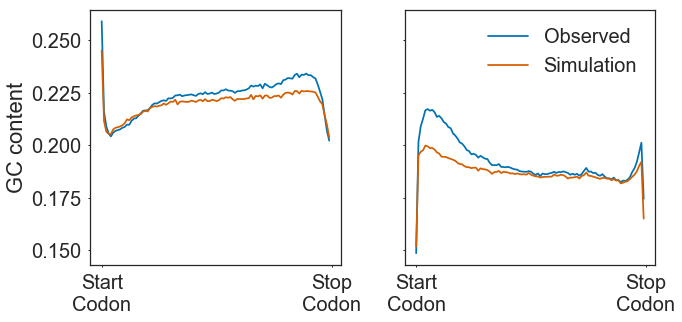

In [62]:
fig, ax = plt.subplots(figsize=(10, 5), ncols=2, sharey=True, sharex=True)
ax[0].plot(summarised['real']['g']['fwd'], label='Observed')
ax[0].plot(summarised['sim']['g']['fwd'], label='Simulation')
ax[1].plot(summarised['real']['g']['rev'], label='Observed')
ax[1].plot(summarised['sim']['g']['rev'], label='Simulation')
ax[0].set_xticks([0, 100])
ax[0].set_xticklabels(['Start\nCodon', 'Stop\nCodon'])
ax[0].set_ylabel('GC content')
plt.legend()
plt.tight_layout()
plt.savefig('/home/matthew/Documents/papers_and_thesis/thesis/chapter_4/figures/raw/gc_content_revtrans.svg')
plt.show()

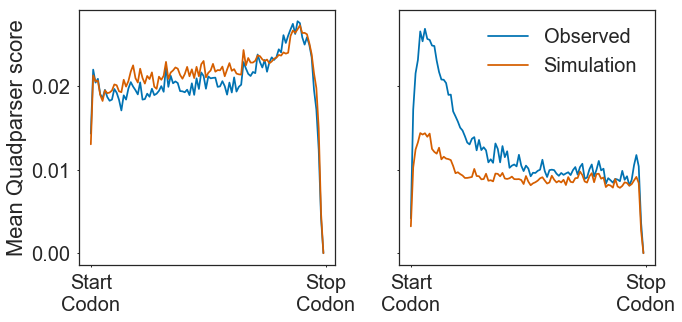

In [66]:
fig, ax = plt.subplots(figsize=(10, 5), ncols=2, sharey=True, sharex=True)
ax[0].plot(summarised['real']['qp']['fwd'])
ax[0].plot(summarised['sim']['qp']['fwd'])
ax[1].plot(summarised['real']['qp']['rev'],label='Observed')
ax[1].plot(summarised['sim']['qp']['rev'], label='Simulation')
ax[0].set_xticks([0, 100])
ax[0].set_xticklabels(['Start\nCodon', 'Stop\nCodon'])
ax[0].set_ylabel('Mean Quadparser score')
plt.legend()
plt.tight_layout()
plt.savefig('/home/matthew/Documents/papers_and_thesis/thesis/chapter_4/figures/raw/qp_content_revtrans.svg')
plt.show()

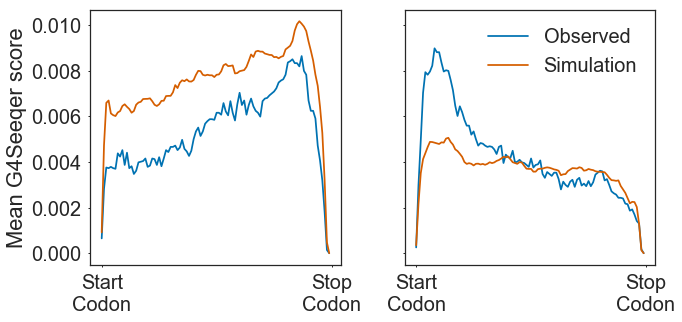

In [68]:
fig, ax = plt.subplots(figsize=(10, 5), ncols=2, sharey=True, sharex=True)
ax[0].plot(summarised['real']['g4s']['fwd'])
ax[0].plot(summarised['sim']['g4s']['fwd'])
ax[1].plot(summarised['real']['g4s']['rev'],label='Observed')
ax[1].plot(summarised['sim']['g4s']['rev'], label='Simulation')
ax[0].set_xticks([0, 100])
ax[0].set_xticklabels(['Start\nCodon', 'Stop\nCodon'])
ax[0].set_ylabel('Mean G4Seeqer score')
plt.legend()
plt.tight_layout()
plt.savefig('/home/matthew/Documents/papers_and_thesis/thesis/chapter_4/figures/raw/g4s_content_revtrans.svg')
plt.show()